In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress


In [3]:
movies = Path('resources/movies_metadata.csv')


movie_df = pd.read_csv(movies, low_memory=False)


movie_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
clean_movie = movie_df[['title','budget','revenue','release_date','vote_average','genres']]
clean_movie

,title,budget,revenue,release_date,vote_average,genres
0,Toy Story,30000000,373554033.0,1995-10-30,7.7,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,65000000,262797249.0,1995-12-15,6.9,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,0,0.0,1995-12-22,6.5,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,16000000,81452156.0,1995-12-22,6.1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,0,76578911.0,1995-02-10,5.7,"[{'id': 35, 'name': 'Comedy'}]"
...,...,...,...,...,...,...
45461,Subdue,0,0.0,NaN,4.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,Century of Birthing,0,0.0,2011-11-17,9.0,"[{'id': 18, 'name': 'Drama'}]"
45463,Betrayal,0,0.0,2003-08-01,3.8,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,Satan Triumphant,0,0.0,1917-10-21,0.0,[]


In [5]:
cleaned = clean_movie.rename(columns={
    'release_date':'date',
    'vote_average':'rating'
})
cleaned.count()

title      45460
budget     45466
revenue    45460
date       45379
rating     45460
genres     45466
dtype: int64

In [6]:
#dropping any null values
cleaner = cleaned.dropna(how='any')
cleaner = cleaner[~cleaner[list(('budget','revenue', 'rating'))].eq(0).all(axis = 1)]
cleaner

,title,budget,revenue,date,rating,genres
0,Toy Story,30000000,373554033.0,1995-10-30,7.7,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,65000000,262797249.0,1995-12-15,6.9,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,0,0.0,1995-12-22,6.5,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,16000000,81452156.0,1995-12-22,6.1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,0,76578911.0,1995-02-10,5.7,"[{'id': 35, 'name': 'Comedy'}]"
...,...,...,...,...,...,...
45460,Robin Hood,0,0.0,1991-05-13,5.7,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name..."
45462,Century of Birthing,0,0.0,2011-11-17,9.0,"[{'id': 18, 'name': 'Drama'}]"
45463,Betrayal,0,0.0,2003-08-01,3.8,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,Satan Triumphant,0,0.0,1917-10-21,0.0,[]


In [7]:
#wanted to pull all the info from the 'genres' column to see what was going on.
max_genres = cleaner['genres'].str.count(',').max()+1
new_columns = [f'genre{i}' for i in range(1, max_genres +1)]
cleaner[new_columns] = cleaner['genres'].str.split(',', expand=True)
print(cleaner)

                             title    budget      revenue        date  rating  \
0                        Toy Story  30000000  373554033.0  1995-10-30     7.7   
1                          Jumanji  65000000  262797249.0  1995-12-15     6.9   
2                 Grumpier Old Men         0          0.0  1995-12-22     6.5   
3                Waiting to Exhale  16000000   81452156.0  1995-12-22     6.1   
4      Father of the Bride Part II         0   76578911.0  1995-02-10     5.7   
...                            ...       ...          ...         ...     ...   
45460                   Robin Hood         0          0.0  1991-05-13     5.7   
45462          Century of Birthing         0          0.0  2011-11-17     9.0   
45463                     Betrayal         0          0.0  2003-08-01     3.8   
45464             Satan Triumphant         0          0.0  1917-10-21     0.0   
45465                     Queerama         0          0.0  2017-06-09     0.0   

                           

In [8]:
#wanted to remove all the extra columns that held no info 
cleaner.drop(cleaner.columns[[5,12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)
cleaner

,title,budget,revenue,date,rating,genre1,genre2,genre3,genre4,genre5,genre6
0,Toy Story,30000000,373554033.0,1995-10-30,7.7,[{'id': 16,'name': 'Animation'},{'id': 35,'name': 'Comedy'},{'id': 10751,'name': 'Family'}]
1,Jumanji,65000000,262797249.0,1995-12-15,6.9,[{'id': 12,'name': 'Adventure'},{'id': 14,'name': 'Fantasy'},{'id': 10751,'name': 'Family'}]
2,Grumpier Old Men,0,0.0,1995-12-22,6.5,[{'id': 10749,'name': 'Romance'},{'id': 35,'name': 'Comedy'}],None,None
3,Waiting to Exhale,16000000,81452156.0,1995-12-22,6.1,[{'id': 35,'name': 'Comedy'},{'id': 18,'name': 'Drama'},{'id': 10749,'name': 'Romance'}]
4,Father of the Bride Part II,0,76578911.0,1995-02-10,5.7,[{'id': 35,'name': 'Comedy'}],None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
45460,Robin Hood,0,0.0,1991-05-13,5.7,[{'id': 18,'name': 'Drama'},{'id': 28,'name': 'Action'},{'id': 10749,'name': 'Romance'}]
45462,Century of Birthing,0,0.0,2011-11-17,9.0,[{'id': 18,'name': 'Drama'}],None,None,None,None
45463,Betrayal,0,0.0,2003-08-01,3.8,[{'id': 28,'name': 'Action'},{'id': 18,'name': 'Drama'},{'id': 53,'name': 'Thriller'}]
45464,Satan Triumphant,0,0.0,1917-10-21,0.0,[],None,None,None,None,None


In [9]:
#did the same as above but for 'date' column
max_dates = cleaner['date'].str.count('-').max()+1
max_dates
new_dates = [f'date{i}' for i in range(1, max_dates +1)]
cleaner[new_dates] = cleaner['date'].str.split('-', expand=True)
print(cleaner)

                             title    budget      revenue        date  rating  \
0                        Toy Story  30000000  373554033.0  1995-10-30     7.7   
1                          Jumanji  65000000  262797249.0  1995-12-15     6.9   
2                 Grumpier Old Men         0          0.0  1995-12-22     6.5   
3                Waiting to Exhale  16000000   81452156.0  1995-12-22     6.1   
4      Father of the Bride Part II         0   76578911.0  1995-02-10     5.7   
...                            ...       ...          ...         ...     ...   
45460                   Robin Hood         0          0.0  1991-05-13     5.7   
45462          Century of Birthing         0          0.0  2011-11-17     9.0   
45463                     Betrayal         0          0.0  2003-08-01     3.8   
45464             Satan Triumphant         0          0.0  1917-10-21     0.0   
45465                     Queerama         0          0.0  2017-06-09     0.0   

              genre1       

In [10]:
#it felt easier to just copy what I did above
cleaner.drop(cleaner.columns[[5,7,9,12,13]], axis=1, inplace=True)
cleaner

,title,budget,revenue,date,rating,genre2,genre4,genre6,date1
0,Toy Story,30000000,373554033.0,1995-10-30,7.7,'name': 'Animation'},'name': 'Comedy'},'name': 'Family'}],1995
1,Jumanji,65000000,262797249.0,1995-12-15,6.9,'name': 'Adventure'},'name': 'Fantasy'},'name': 'Family'}],1995
2,Grumpier Old Men,0,0.0,1995-12-22,6.5,'name': 'Romance'},'name': 'Comedy'}],None,1995
3,Waiting to Exhale,16000000,81452156.0,1995-12-22,6.1,'name': 'Comedy'},'name': 'Drama'},'name': 'Romance'}],1995
4,Father of the Bride Part II,0,76578911.0,1995-02-10,5.7,'name': 'Comedy'}],None,None,1995
...,...,...,...,...,...,...,...,...,...
45460,Robin Hood,0,0.0,1991-05-13,5.7,'name': 'Drama'},'name': 'Action'},'name': 'Romance'}],1991
45462,Century of Birthing,0,0.0,2011-11-17,9.0,'name': 'Drama'}],None,None,2011
45463,Betrayal,0,0.0,2003-08-01,3.8,'name': 'Action'},'name': 'Drama'},'name': 'Thriller'}],2003
45464,Satan Triumphant,0,0.0,1917-10-21,0.0,None,None,None,1917


In [11]:
#had to have some help with chatgpt to get rid of " 'name': " from the names in genre2 
#so it'll just read as the genre it is

cleaner['genre2'] = cleaner['genre2'].str.extract("'name': '([^']*)'")

cleaner.head()

,title,budget,revenue,date,rating,genre2,genre4,genre6,date1
0,Toy Story,30000000,373554033.0,1995-10-30,7.7,Animation,'name': 'Comedy'},'name': 'Family'}],1995
1,Jumanji,65000000,262797249.0,1995-12-15,6.9,Adventure,'name': 'Fantasy'},'name': 'Family'}],1995
2,Grumpier Old Men,0,0.0,1995-12-22,6.5,Romance,'name': 'Comedy'}],None,1995
3,Waiting to Exhale,16000000,81452156.0,1995-12-22,6.1,Comedy,'name': 'Drama'},'name': 'Romance'}],1995
4,Father of the Bride Part II,0,76578911.0,1995-02-10,5.7,Comedy,None,None,1995


In [12]:
#Wanted to drop genre4 and genre6 '(but not get rid of it from the data frame)' 
#and move date1 to the front as it should help with making the graphs and such

almost = cleaner[['date1','title','budget','revenue','rating','genre2']]
#wanted to change the name of the columns to make it a little bit easier to work with
close = almost.rename(columns={
    'date1':'year',
    'genre2':'genre'
})
#made sure to clear all the dates we dont want
scrubbed = close[close['year'].astype(int) > 2009]
juggle = scrubbed[scrubbed['year'].astype(int) < 2021]
juggle = juggle.sort_values('year', ascending=True)
juggle

,year,title,budget,revenue,rating,genre
868,2010,Venice,0,0.0,7.5,Drama
19283,2010,Run Sister Run!,1552334,0.0,6.3,Drama
19280,2010,Amish Grace,0,0.0,6.3,Drama
43916,2010,Christmas Mail,0,0.0,5.0,Comedy
22972,2010,Elena Undone,0,0.0,6.8,Drama
...,...,...,...,...,...,...
44535,2018,Mobile Homes,0,0.0,0.0,Drama
30402,2018,Bad Boys for Life,0,0.0,0.0,Thriller
38885,2018,The Other Side of the Wind,12000000,0.0,0.0,Comedy
38130,2018,Mary Shelley,0,0.0,0.0,Drama


In [13]:
#not sure if we wanted to keep any of the columns as with values that are either zero or 0.0 or NaN
#so with this box of coding and lower are me removing all zero,0.0, or NaN values from the dataframe
columns_to_check = ['budget', 'revenue','genre','rating'] 
scrubbed = scrubbed[~scrubbed[columns_to_check].astype(str).isin(['0', '0.0', np.nan]).any(axis=1)]
scrubbed

,year,title,budget,revenue,rating,genre
4356,2013,Camille Claudel 1915,3512454,115860.0,7.0,Drama
11155,2011,Black Gold,40000000,5446000.0,5.9,Adventure
14630,2010,Leap Year,19000000,29922472.0,6.5,Romance
14631,2010,The Book of Eli,80000000,157107755.0,6.6,Action
14740,2010,Legion,26000000,67918658.0,5.2,Horror
...,...,...,...,...,...,...
45014,2017,The Dark Tower,60000000,71000000.0,5.7,Action
45139,2017,The Emoji Movie,50000000,66913939.0,5.8,Comedy
45167,2017,Wind River,11000000,184770205.0,7.4,Action
45399,2014,All at Once,750000,3.0,6.0,Crime


<Axes: title={'center': 'Genre Average Rating'}, xlabel='genre'>

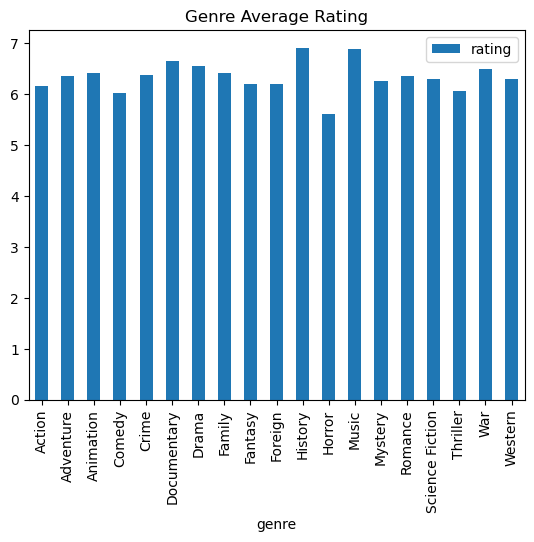

In [120]:
### Top Movie Genres

genre_ratings_df = scrubbed[['genre', 'rating']]

genre_ratings_df = genre_ratings_df.groupby(['genre'])

average_rating = genre_ratings_df.mean()



average_rating.plot(kind="bar", title="Genre Average Rating")



/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_48342/3605284903.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  history_year = history_df.groupby(['year']).mean()


<Axes: title={'center': "History Rating's Over Time"}, xlabel='year', ylabel='rating'>

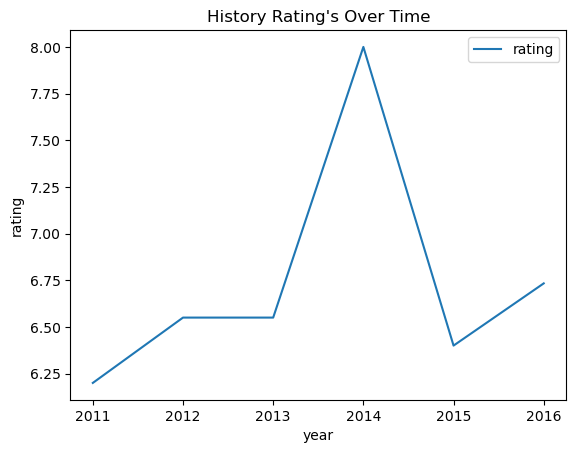

In [123]:
### History Over Time

history_df = scrubbed.loc[scrubbed['genre']=='History']

history_df = history_df[['year', 'title', 'rating', 'genre']]

history_year = history_df.groupby(['year']).mean()

history_year.plot(kind='line', xlabel='year', ylabel='rating', title="History Rating's Over Time")



/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_48342/3340696086.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  horror_year = horror_df.groupby(['year']).mean()


<Axes: title={'center': "Horror Rating's Over Time"}, xlabel='year', ylabel='rating'>

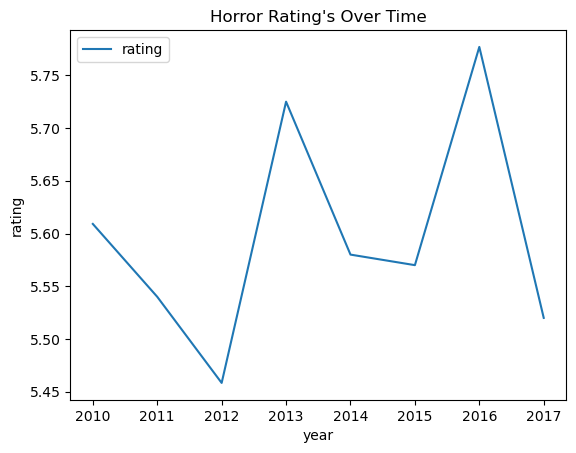

In [124]:
### Horror Over Time

horror_df = scrubbed.loc[scrubbed['genre']=='Horror']

horror_df = horror_df[['year', 'title', 'rating', 'genre']]

horror_year = horror_df.groupby(['year']).mean()

horror_year.plot(kind='line', xlabel='year', ylabel='rating', title= "Horror Rating's Over Time")



The r-squared is: 0.0034461596770686267


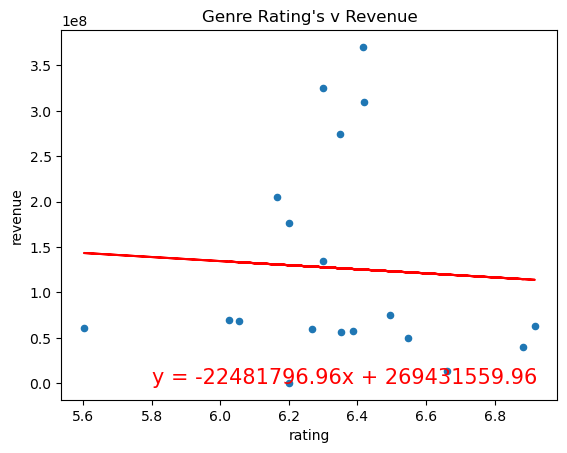

In [126]:
### Revenue v Movie Rating


# colors = ['dimgrey', 'rosybrown', 'firebrick', 'salmon', 'sienna', 'peru', 'navajowhite',
#          'orange', 'gold', 'olive', 'lawngreen', 'aquamarine', 'teal', 'dodgerblue',
#          'royalblue', 'lavender', 'darkslateblue', 'indigo', 'orchid']


movies_types = scrubbed.groupby(['genre'])

rev_rating = movies_types[['rating', 'revenue']].mean()

rev_rating

rev_rating.plot(kind="scatter", x="rating", y="revenue", title="Genre Rating's v Revenue")


x_values = rev_rating['rating']
y_values = rev_rating['revenue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")



print(f"The r-squared is: {rvalue**2}")




/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_48342/3538306147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_rating['budget'] = budget_rating.loc[:,'budget'].astype('float64')


The r-squared is: 0.00545952013954174


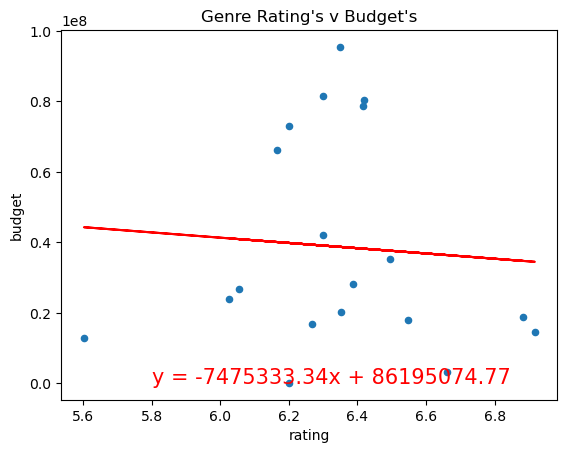

In [128]:
### Rating v Budget

budget_rating = scrubbed[['genre','rating', 'budget']]

budget_rating['budget'] = budget_rating.loc[:,'budget'].astype('float64')

budget_rating

genre_budgets = budget_rating.groupby(['genre'])

bud_rating = genre_budgets[['rating', 'budget']].mean()

bud_rating

bud_rating.plot(kind="scatter", x="rating", y="budget", title="Genre Rating's v Budget's")

x_values = bud_rating['rating']
y_values = bud_rating['budget']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")



The r-squared is: 0.04157590985872297


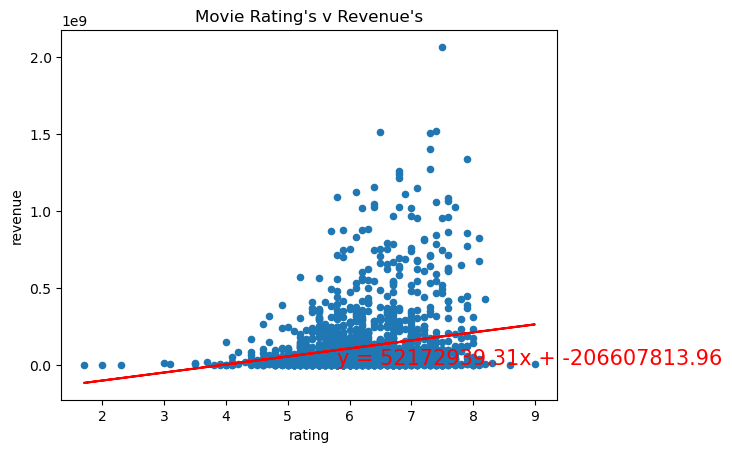

In [133]:
### Movies Rev V Ratings



movie_rev_ratings = scrubbed[['title', 'rating', 'revenue', 'genre']]

# colors = ['dimgrey', 'rosybrown', 'firebrick', 'salmon', 'sienna', 'peru', 'navajowhite',
#          'orange', 'gold', 'olive', 'lawngreen', 'aquamarine', 'teal', 'dodgerblue',
#          'royalblue', 'lavender', 'darkslateblue', 'indigo', 'orchid', 'crimson']

movie_rev_ratings

movie_rev_ratings.plot(kind='scatter', x='rating', y='revenue', title="Movie Rating's v Revenue's")

x_values = movie_rev_ratings['rating']
y_values = movie_rev_ratings['revenue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#plt.legend(handles=[action, adventure, family, war], loc="best")

Drama = movie_rev_ratings.loc[movie_rev_ratings['genre']=='Drama']



# action = ['Action']
# adventure = ['Adventure']
# family = ['Family']
# foreign = [['Foreign']]
# history = [['History']]
# war = ['War']





/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_48342/545171575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_bud_ratings['budget'] = budget_rating.loc[:,'budget'].astype('float64')


The r-squared is: 0.005991810015598433


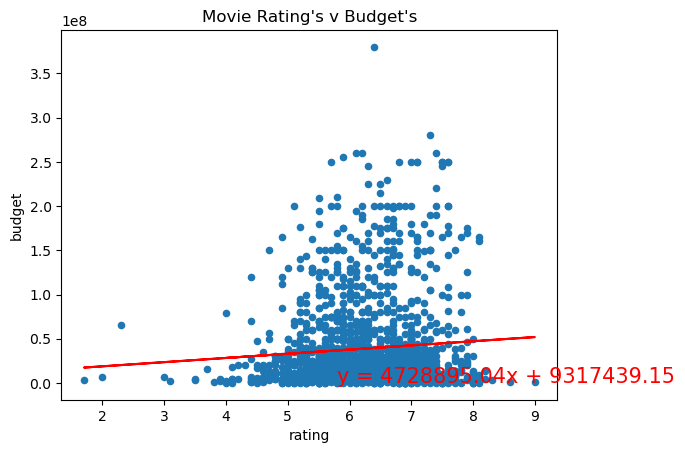

In [131]:
### Movies Budget V Ratings

movie_bud_ratings = scrubbed[['title', 'rating', 'budget']]

movie_bud_ratings['budget'] = budget_rating.loc[:,'budget'].astype('float64')



movie_bud_ratings.plot(kind='scatter', x='rating', y='budget', title="Movie Rating's v Budget's")

x_values = movie_bud_ratings['rating']
y_values = movie_bud_ratings['budget']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
